In [1]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

### Read train data and test data

In [2]:
df_train = pd.read_csv("../data/train.csv")
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [3]:
df_test = pd.read_csv("../data/test.csv")
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region


### One hot encoding region

In [4]:
df_encoded = pd.get_dummies(df_train['region']).astype(int)
df_train = df_train.drop('region',axis = 1)
df_train = df_train.join(df_encoded)
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,monthly_rent,central region,east region,north region,north-east region,west region
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,1600,0,0,0,0,1
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,2250,0,1,0,0,0
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,1900,1,0,0,0,0
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,2850,0,1,0,0,0
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,2100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,2200,0,0,0,1,0
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,4100,1,0,0,0,0
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,2250,0,1,0,0,0
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,4700,0,1,0,0,0


In [5]:
df_encoded = pd.get_dummies(df_test['region']).astype(int)
df_test = df_test.drop('region',axis = 1)
df_test = df_test.join(df_encoded)
df_test

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,central region,east region,north region,north-east region,west region
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,0,0,0,1,0
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,0,0,1,0,0
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,0,0,0,0,1
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,0,0,0,0,1
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2022-08,punggol,615b,edgefield plains,4-room,model a,92.0,yes,2012,1.403746,103.909883,0.0,waterway east,punggol,0,0,0,1,0
29996,2023-02,sembawang,491,admiralty link,4-room,model a,90.0,yes,2004,1.456113,103.817717,0.0,sembawang north,sembawang,0,0,1,0,0
29997,2023-05,ang mo kio,524,ang mo kio avenue 5,3-room,new generation,68.0,yes,1980,1.373378,103.853043,0.0,cheng san,ang mo kio,0,0,0,1,0
29998,2023-02,woodlands,656,woodlands ring road,executive,maisonette,144.0,yes,1998,1.436986,103.799118,0.0,woodlands east,woodlands,0,0,1,0,0


### Drop columns: 'block', 'street_name', 'subzone', 'planning_area'

In [6]:
df_train = df_train.drop(columns=['block', 'street_name', 'subzone', 'planning_area'], errors='ignore')
df_test = df_test.drop(columns=['block', 'street_name', 'subzone', 'planning_area'], errors='ignore')

### Read existing mrt stations data

In [7]:
df_mrt = pd.read_csv("../auxiliary-data/sg-mrt-existing-stations.csv")
print('Number of mrt station records: {}'.format(len(df_mrt)))
df_mrt.head()

Number of mrt station records: 162


,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


===============

In [8]:
from scipy.spatial import cKDTree

rental_apartments = df_train[['latitude', 'longitude']]

subway_stations = df_mrt[['latitude', 'longitude']]

# Build a spatial index for subway stations
subway_tree = cKDTree(subway_stations[['latitude', 'longitude']])

# Function to find nearest station using spatial indexing
def find_nearest_station(apartment, subway_tree, subway_stations):
    distances, indices = subway_tree.query(
        (apartment['latitude'], apartment['longitude']),
        k=1
    )
    nearest_station = subway_stations.loc[indices]
    return nearest_station

result = rental_apartments.apply(lambda x: find_nearest_station(x, subway_tree, subway_stations), axis=1)


In [9]:
loc1 = (result.loc[0]['latitude'], result.loc[0]['longitude'])
loc2 = (df_train.loc[0]['latitude'], df_train.loc[0]['longitude'])
distance = geodesic(loc1, loc2).kilometers
distance

0.6993011758260743

In [10]:
df_new = pd.read_csv("../data/train_new.csv")
df_new.loc[0]['min_distance']

0.699301175825986

### Calculate the distance (km) to the nearest mrt station

In [7]:
def calculate_min_distance(row):
    min_distance = float('inf')
    for _, df2_row in df_mrt.iterrows():
        loc1 = (row['latitude'], row['longitude'])
        loc2 = (df2_row['latitude'], df2_row['longitude'])
        distance = geodesic(loc1, loc2).kilometers
        if distance < min_distance:
            min_distance = distance
    return min_distance

In [ ]:
df_train['min_distance'] = df_train.apply(calculate_min_distance, axis=1)

In [ ]:
df_test['min_distance'] = df_test.apply(calculate_min_distance, axis=1)

In [13]:
df_train.head()

,rent_approval_date,town,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,monthly_rent,central region,east region,north region,north-east region,west region,min_distance
0,2021-09,jurong east,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,1600,0,0,0,0,1,0.699301
1,2022-05,bedok,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,2250,0,1,0,0,0,0.899077
2,2022-10,toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,1900,1,0,0,0,0,0.218801
3,2021-08,pasir ris,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,2850,0,1,0,0,0,1.547366
4,2022-11,kallang/whampoa,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,2100,1,0,0,0,0,0.187930


In [10]:
df_test.head()

,rent_approval_date,town,flat_type,flat_model,floor_area_sqm,lease_commence_date,latitude,longitude,region,min_distance
0,2023-01,hougang,5-room,improved,121.0,1984,1.358411,103.891722,north-east region,0.821030
1,2022-09,sembawang,4-room,model a,100.0,1999,1.446343,103.820817,north region,0.306192
2,2023-07,clementi,4-room,new generation,91.0,1980,1.305719,103.762168,west region,1.092259
3,2021-08,jurong east,3-room,model a,74.0,1986,1.344832,103.730778,west region,0.361691
4,2022-03,jurong east,5-room,improved,121.0,1983,1.345437,103.735241,west region,0.447607


In [11]:
# df_train.to_csv("train_mrt_dis.csv", index=False)
# df_test.to_csv("test_mrt_dis.csv", index=False)

In [9]:
df_train = pd.read_csv("../data/train_new.csv")
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.038835,0,0,0,0,1,2461.419769,2334.161163,2,67.0,...,1,0,0,0,0,0,0,0,0,1
1,0.504854,0,0,0,1,0,2371.483467,2341.480947,2,92.0,...,0,1,0,0,0,0,1,0,0,0
2,0.529126,0,0,0,1,1,2465.059892,2429.073831,7,67.0,...,1,0,0,0,0,1,0,0,0,0
3,0.033981,0,0,1,0,0,2419.540115,2635.040637,9,149.0,...,0,0,1,0,0,0,1,0,0,0
4,0.533981,0,0,1,0,1,2479.255239,2173.943626,7,68.0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
df_test = pd.read_csv("../data/test_new.csv")
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town_0,town_1,town_2,town_3,town_4,block,street_name,flat_model,floor_area_sqm,...,flat_type_3-room,flat_type_4-room,flat_type_executive,flat_type_5-room,flat_type_2-room,central region,east region,north region,north-east region,west region
0,0.970874,1,0,1,1,1,2624.520690,2379.499974,7,121.0,...,0,0,0,1,0,0,0,0,1,0
1,0.524272,0,1,1,1,0,2524.058532,2615.882473,6,100.0,...,0,1,0,0,0,0,0,1,0,0
2,1.000000,0,1,1,0,0,2696.577167,2567.505982,2,91.0,...,0,1,0,0,0,0,0,0,0,1
3,0.033981,0,0,0,0,1,2515.834726,2821.948226,6,74.0,...,1,0,0,0,0,0,0,0,0,1
4,0.495146,0,0,0,0,1,2609.989756,2282.274343,7,121.0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
df_train.columns

Index(['rent_approval_date', 'town_0', 'town_1', 'town_2', 'town_3', 'town_4',
       'block', 'street_name', 'flat_model', 'floor_area_sqm', 'furnished',
       'lease_commence_date', 'latitude', 'longitude', 'elevation', 'subzone',
       'planning_area_0', 'planning_area_1', 'planning_area_2',
       'planning_area_3', 'planning_area_4', 'monthly_rent', 'avg_stock_price',
       'num_shopping_malls', 'min_distance', 'avg_coe_price',
       'min_distance_planned', 'num_primary_schools', 'flat_type_3-room',
       'flat_type_4-room', 'flat_type_executive', 'flat_type_5-room',
       'flat_type_2-room', 'central region', 'east region', 'north region',
       'north-east region', 'west region'],
      dtype='object')

In [12]:
X_train = df_train[['rent_approval_date', 'town_0', 'town_1', 'town_2', 'town_3', 'town_4',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'avg_stock_price', 'num_shopping_malls', 'min_distance',
       'flat_type_3-room', 'flat_type_4-room', 'flat_type_executive', 'flat_type_5-room', 'flat_type_2-room',
       'central region', 'east region', 'north region', 'north-east region', 'west region']].values
y_train = df_train['monthly_rent'].values

X_test = df_test[['rent_approval_date', 'town_0', 'town_1', 'town_2', 'town_3', 'town_4',
       'flat_model', 'floor_area_sqm', 'lease_commence_date', 'avg_stock_price', 'num_shopping_malls', 'min_distance',
       'flat_type_3-room', 'flat_type_4-room', 'flat_type_executive', 'flat_type_5-room', 'flat_type_2-room',
       'central region', 'east region', 'north region', 'north-east region', 'west region']].values


In [13]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

In [16]:
knn_model = make_pipeline(preprocessing.StandardScaler(), 
                          KNeighborsRegressor(n_neighbors=5))

In [34]:
# %%time
k_vals = [i for i in range(1, 100)]
knn_mae = []
for k in k_vals:
    knn_model = make_pipeline(preprocessing.StandardScaler(), 
                              KNeighborsRegressor(n_neighbors=k))
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    knn_mae.append(np.mean(-scores))

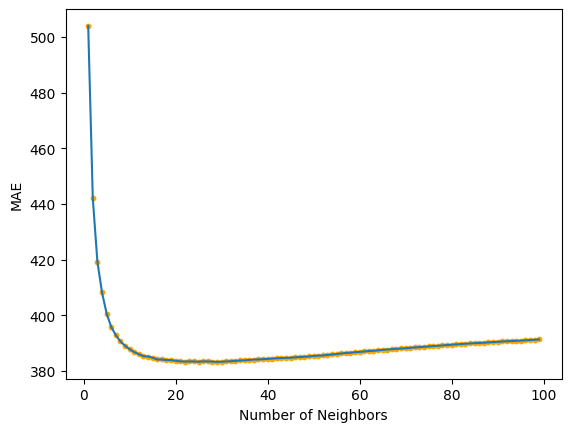

In [39]:
plt.plot(k_vals,knn_mae)
plt.scatter(k_vals,knn_mae,c='orange',s=10)
plt.ylabel('MAE')
plt.xlabel('Number of Neighbors')
plt.show()

In [38]:
knn_mae[20:30]

[383.41638888888895,
 383.34128787878785,
 383.3797826086957,
 383.3620138888889,
 383.2781,
 383.4205769230769,
 383.3749691358024,
 383.31892857142856,
 383.20798850574715,
 383.28127777777775]

In [37]:
knn_mae.index(min(knn_mae))

28

In [39]:
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)
y_pred = knn_regressor.predict(X_test_scaled)

In [40]:
y_pred = [int(x) for x in y_pred] 
print(len(y_pred))
print(y_pred[:5])

30000
[2870, 2940, 4030, 2110, 2770]


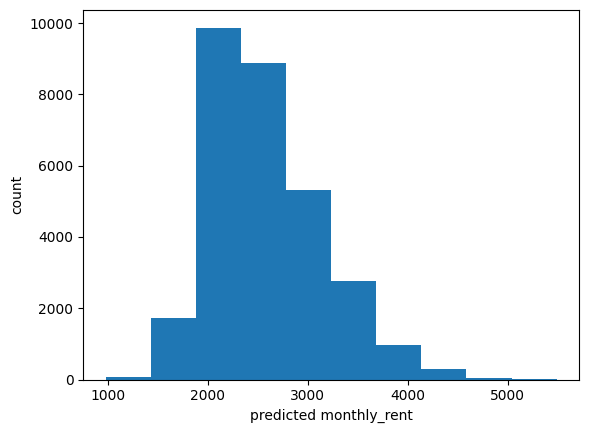

In [43]:
plt.hist(y_pred)
plt.xlabel('predicted monthly_rent')
plt.ylabel('count')
plt.show()

In [44]:
df = pd.DataFrame(y_pred, columns =['Predicted'], dtype = float) 
df.head()

,Predicted
0,2870.0
1,2940.0
2,4030.0
3,2110.0
4,2770.0


In [45]:
df.to_csv("../data/lhq_output.csv", index_label='Id')